In [158]:
import pandas as pd
import numpy as np

# my functions
import helpers.data_mining_helpers as dmh

txt_DB = []
token_DB = []
num_DB = []
dataset = ['amazon_cells_labelled.txt','imdb_labelled.txt','yelp_labelled.txt']
data_name = 'amazon_cells_labelled.txt'
path = 'sentiment labelled sentences/sentiment labelled sentences/'
f = open( path + data_name, encoding="utf-8"  )
txt =  f.readline()
while txt:
    temp = txt.split('\t')
    txt_DB.append(temp[0])
    num_DB.append( int(temp[1]))
    txt =  f.readline()
f.close()    
txt_list = []
for i in range(len(num_DB)):
    txt_list.append([txt_DB[i],num_DB[i]])
np.array(txt_list)
X1 = pd.DataFrame.from_records(txt_list , columns= ['text','category'])
X1['data_from'] = data_name
data_name = 'imdb_labelled.txt'

f = open( path + data_name, encoding="utf-8" )
txt =  f.readline()
txt_DB=[]
num_DB=[]
while txt:
    temp = txt.split('\t')
    txt_DB.append(temp[0])
    num_DB.append( int(temp[1]))
    txt =  f.readline()
f.close() 
txt_list = []
for i in range(len(num_DB)):
    txt_list.append([txt_DB[i],num_DB[i]])
np.array(txt_list)    
X2 = pd.DataFrame.from_records(txt_list , columns= ['text','category'])
X2['data_from'] = data_name
X1 = pd.concat([X1, X2], ignore_index=True)   
data_name = 'yelp_labelled.txt'

f = open( path + data_name, encoding="utf-8" )
txt =  f.readline()
txt_DB=[]
num_DB=[]
while txt:
    temp = txt.split('\t')
    txt_DB.append(temp[0])
    num_DB.append( int(temp[1]))
    txt =  f.readline()
f.close() 
txt_list = []
for i in range(len(num_DB)):
    txt_list.append([txt_DB[i],num_DB[i]])
np.array(txt_list)    
X2 = pd.DataFrame.from_records(txt_list , columns= ['text','category'])
X2['data_from'] = data_name
X = pd.concat([X1, X2], ignore_index=True)   
X

,text,category,data_from
0,So there is no way for me to plug it in here i...,0,amazon_cells_labelled.txt
1,"Good case, Excellent value.",1,amazon_cells_labelled.txt
2,Great for the jawbone.,1,amazon_cells_labelled.txt
3,Tied to charger for conversations lasting more...,0,amazon_cells_labelled.txt
4,The mic is great.,1,amazon_cells_labelled.txt
...,...,...,...
2995,I think food should have flavor and texture an...,0,yelp_labelled.txt
2996,Appetite instantly gone.,0,yelp_labelled.txt
2997,Overall I was not impressed and would not go b...,0,yelp_labelled.txt
2998,"The whole experience was underwhelming, and I ...",0,yelp_labelled.txt


### Missing Values

In [159]:
X.isnull().apply(lambda x: dmh.check_missing_values(x) ) 

,text,category,data_from
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


### Dealing with Duplicate Data

In [161]:
sum(X.duplicated())


17

In [162]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe
#不會顯示刪除的重複資料
sum(X.duplicated())


0

In [163]:
X
#become only2966 data ( delete the 34 data)

,text,category,data_from
0,So there is no way for me to plug it in here i...,0,amazon_cells_labelled.txt
1,"Good case, Excellent value.",1,amazon_cells_labelled.txt
2,Great for the jawbone.,1,amazon_cells_labelled.txt
3,Tied to charger for conversations lasting more...,0,amazon_cells_labelled.txt
4,The mic is great.,1,amazon_cells_labelled.txt
...,...,...,...
2995,I think food should have flavor and texture an...,0,yelp_labelled.txt
2996,Appetite instantly gone.,0,yelp_labelled.txt
2997,Overall I was not impressed and would not go b...,0,yelp_labelled.txt
2998,"The whole experience was underwhelming, and I ...",0,yelp_labelled.txt


### Data Preprocessing

In [127]:
import matplotlib.pyplot as plt
%matplotlib inline

In [164]:
X_sample = X.sample(n=1000)

imdb_labelled.txt            994
yelp_labelled.txt            992
amazon_cells_labelled.txt    980
Name: data_from, dtype: int64


<AxesSubplot:title={'center':'Data distribution'}>

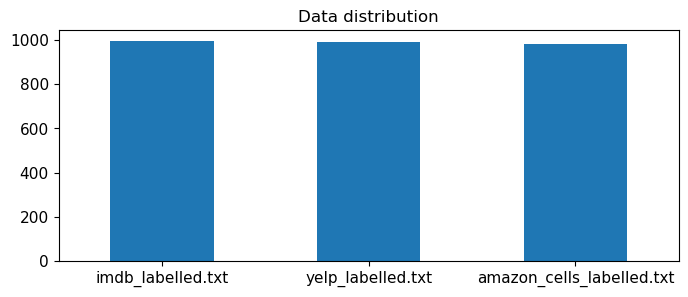

In [168]:
print(X.data_from.value_counts())

# plot barchart for X
X.data_from.value_counts().plot(kind = 'bar',
                                    title = 'Data distribution',      
                                    rot = 0, fontsize = 11, figsize = (8,3))

### >>> **Exercise 7 (5 min):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

<AxesSubplot:title={'center':'Data distribution'}>

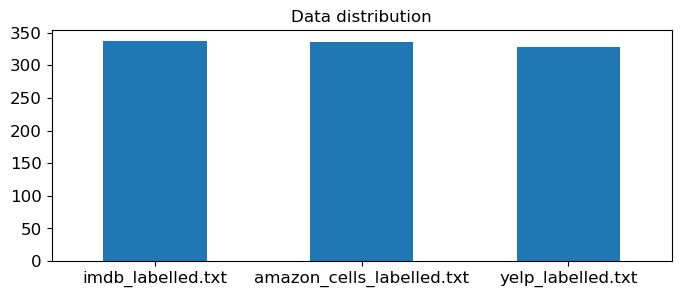

In [166]:
#ans1
X_sample.data_from.value_counts().plot(kind = 'bar',
                                           title = 'Data distribution',                                            
                                           rot = 0, fontsize = 12, figsize = (8,3))

imdb_labelled.txt            354
amazon_cells_labelled.txt    323
yelp_labelled.txt            323
Name: data_from, dtype: int64


<AxesSubplot:title={'center':'Data distribution'}>

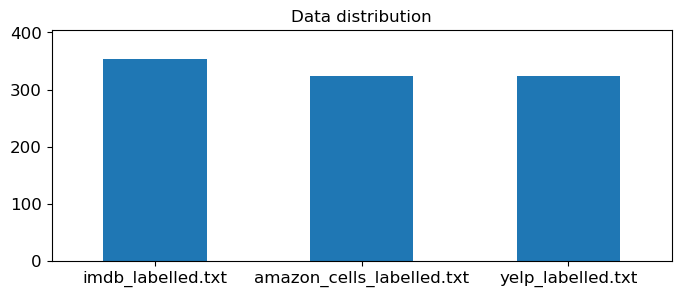

In [131]:
#ans2
upper_bound = max(X_sample.data_from.value_counts() +50 ) #276+50
print( X_sample.data_from.value_counts())
X_sample.data_from.value_counts().plot(kind = 'bar',
                                           title = 'Data distribution', 
                                           ylim = [ 0, upper_bound],
                                           rot = 0, fontsize = 12, figsize = (8,3))

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

yelp_labelled.txt            359
amazon_cells_labelled.txt    323
imdb_labelled.txt            318
Name: data_from, dtype: int64
imdb_labelled.txt            349
amazon_cells_labelled.txt    332
yelp_labelled.txt            319
Name: data_from, dtype: int64


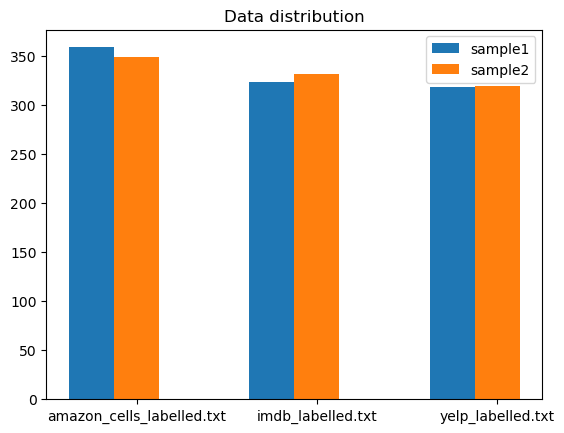

In [167]:
X_sample_1 = X.sample(n=1000) #random state
X_sample_2 = X.sample(n=1000) #random state
x = np.arange(len(dataset))
y1 = X_sample_1.data_from.value_counts() 
print( y1 )
y2 = X_sample_2.data_from.value_counts()
print( y2 )
#upper_bound = max(max(X_sample_1.category_name.value_counts()),max(X_sample_2.category_name.value_counts()))+50  #276+50
plt.bar(x, y1,  label = 'sample1', width=0.25)
plt.bar(x+0.25, y2,  label = 'sample2', width=0.25)
plt.xticks( x+0.25, dataset)
plt.legend()
plt.title('Data distribution')
plt.show()

### 5.3 Feature subset selection
Okay, so we are making some headway here. Let us now make things a bit more interesting. We are going to do something different from what we have been doing thus far. We are going use a bit of everything that we have learned so far. Briefly speaking, we are going to move away from our main dataset (one form of feature subset selection), and we are going to generate a document-term matrix from the original dataset. In other words we are going to be creating something like this. 

In [ ]:
import nltk
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [134]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")
#tokenization, remove step words(e.g. i, a , creat an nigram)


['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

### **>>> Exercise:**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [135]:
tokenized_text = analyze(X[0:1]['text'][0])
print(tokenized_text)

['so', 'there', 'is', 'no', 'way', 'for', 'me', 'to', 'plug', 'it', 'in', 'here', 'in', 'the', 'us', 'unless', 'go', 'by', 'converter']


### **>>> Exercise :**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [136]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [137]:
ans = 0
array = X_counts[0:5, 0:100].toarray()
for i in range(100):
    if array[3][i] == [1]:
        ans = i
print(ans)
print(count_vect.get_feature_names_out()[ans])
count_vect.get_feature_names_out()[0:46]
#ans: "45"
#count_vect.get_feature_names_out()[45] = "45"

45
45


array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17',
       '18', '18th', '1928', '1947', '1948', '1949', '1971', '1973',
       '1979', '1980', '1986', '1995', '1998', '20', '2000', '2005',
       '2006', '2007', '20th', '2160', '23', '24', '25', '2mp', '30',
       '30s', '325', '35', '350', '375', '3o', '40', '40min', '42', '44',
       '45'], dtype=object)

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

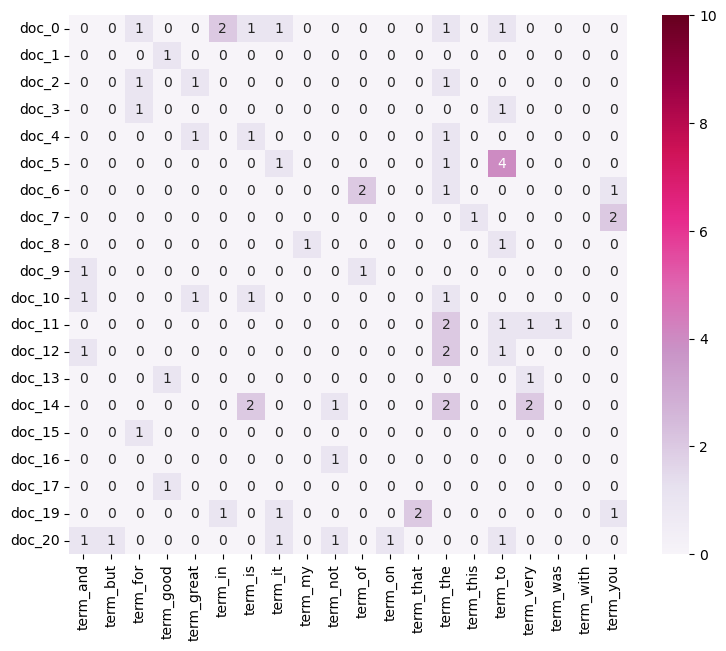

In [138]:
import seaborn as sns
# first twenty features only
count_vect1 = CountVectorizer(max_features=20)
X_max20 = count_vect1.fit_transform(X.text) #learn the vocabulary and return document-term matrix

plot_x = ["term_"+str(i) for i in count_vect1.get_feature_names_out()[0:20]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_max20[:20,0:20].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=10,annot=True)

### 5.4 Dimensionality Reduction
Since we have just touched on the concept of sparsity most naturally the problem of "curse of dimentionality" comes up. I am not going to get into the full details of what dimensionality reduction is and what it is good for just the fact that is an excellent technique for visualizing data efficiently (please refer to notes for more information). All I can say is that we are going to deal with the issue of sparsity with a few lines of code. And we are going to try to visualize our data more efficiently with the results.

We are going to make use of Principal Component Analysis to efficiently reduce the dimensions of our data, with the main goal of "finding a projection that captures the largest amount of variation in the data." This concept is important as it is very useful for visualizing and observing the characteristics of our dataset. 

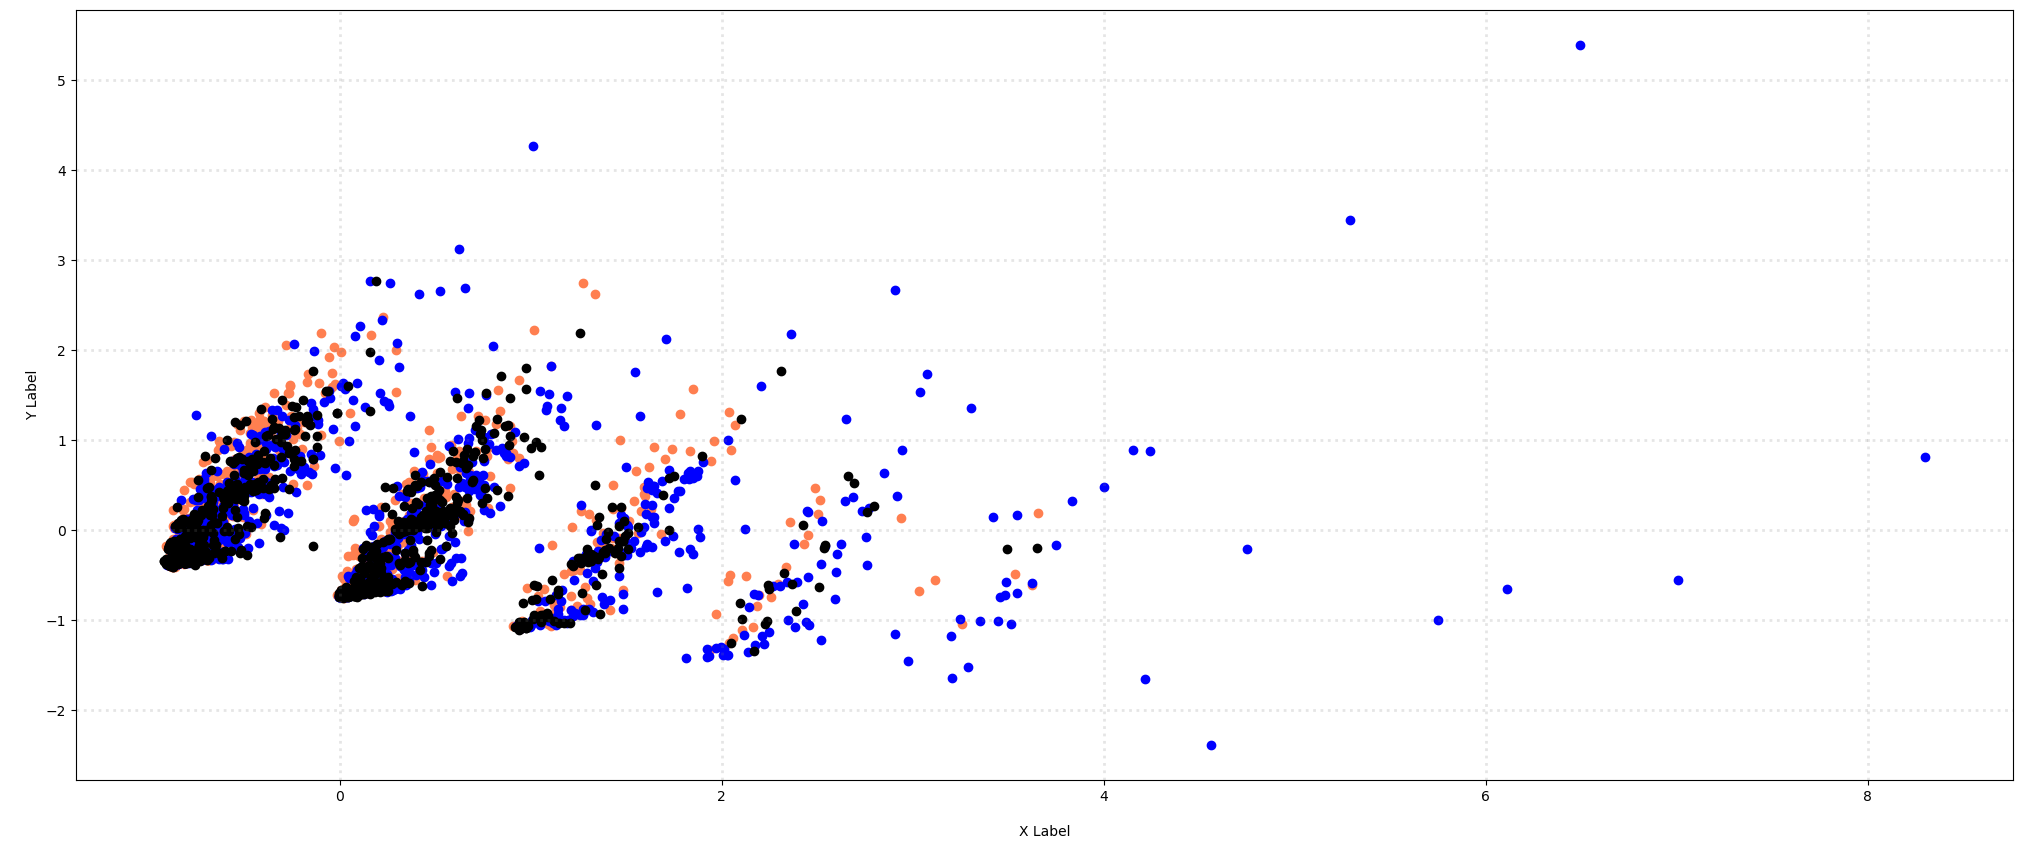

In [139]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, datasets in zip(col, dataset):
    xs = X_reduced[X['data_from'] == datasets].T[0]
    ys = X_reduced[X['data_from'] == datasets].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

𝐻𝑖𝑛𝑡 : you can refer to Axes3D in the documentation.

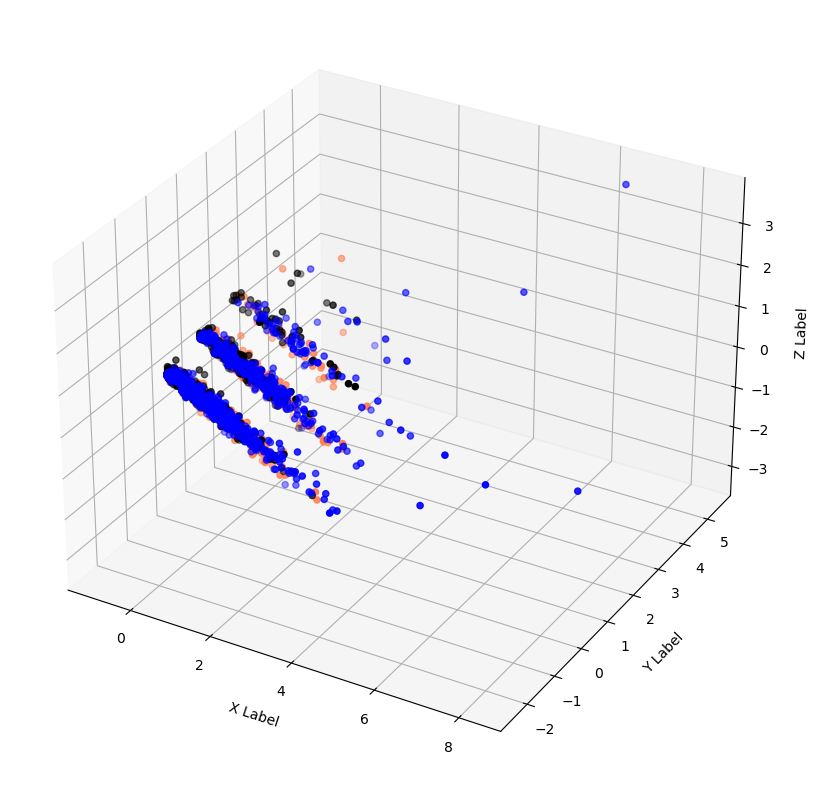

In [140]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
X_reduced.shape
col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = plt.subplot( projection = '3d' )

for c, datasets in zip(col, dataset ):
    xs = X_reduced[X['data_from'] == datasets].T[0]
    ys = X_reduced[X['data_from'] == datasets].T[1]
    zs = X_reduced[X['data_from'] == datasets].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
plt.show()


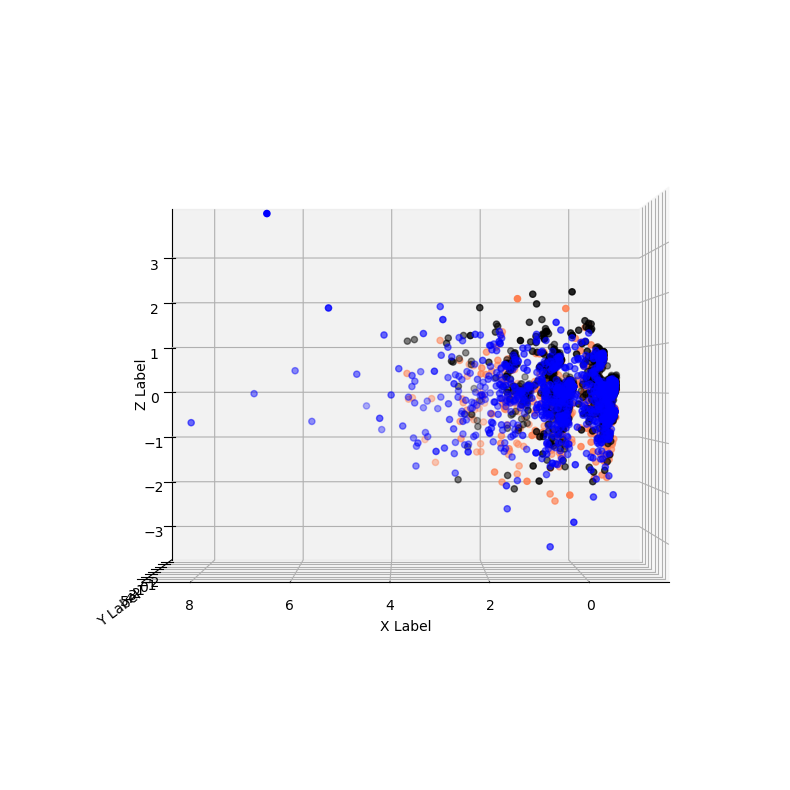

In [141]:

fig = plt.figure(figsize = (25,10))
ax = plt.subplot( projection = '3d' )

for c, datasets in zip(col, dataset ):
    xs = X_reduced[X['data_from'] == datasets].T[0]
    ys = X_reduced[X['data_from'] == datasets].T[1]
    zs = X_reduced[X['data_from'] == datasets].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(0,90)
plt.show()

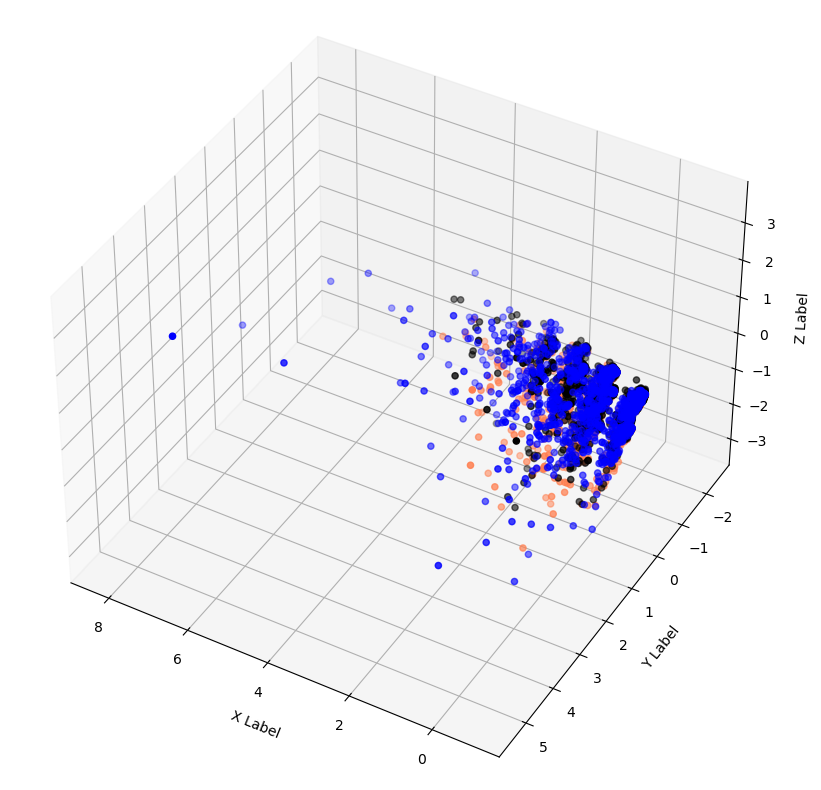

In [142]:

fig = plt.figure(figsize = (25,10))
ax = plt.subplot( projection = '3d' )

for c, datasets in zip(col, dataset ):
    xs = X_reduced[X['data_from'] == datasets].T[0]
    ys = X_reduced[X['data_from'] == datasets].T[1]
    zs = X_reduced[X['data_from'] == datasets].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(40,120)
plt.show()

### 5.5 Attribute Transformation / Aggregation
We can do other things with the term-vector matrix besides applying dimensionality reduction technique to deal with sparsity problem. Here we are going to generate a simple distribution of the words found in all the entire set of articles. Intuitively, this may not make any sense, but in data science sometimes we take some things for granted, and we just have to explore the data first before making any premature conclusions. On the topic of attribute transformation, we will take the word distribution and put the distribution in a scale that makes it easy to analyze patterns in the distrubution of words. Let us get into it!

In [143]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for

term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies[0] #sum of first term

1

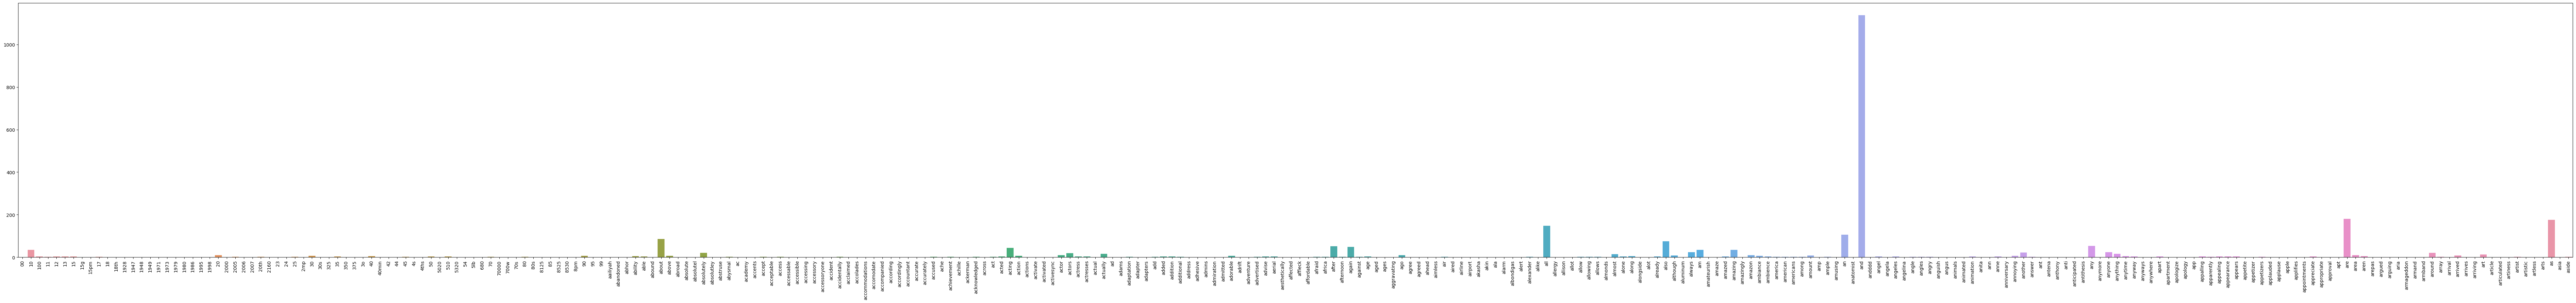

In [144]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [145]:
import plotly.express as px
px.bar(term_frequencies, x=count_vect.get_feature_names_out()[:300], y=term_frequencies[:300])


### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [146]:
array = pd.DataFrame({ 'x':count_vect.get_feature_names_out(),
                       'y':term_frequencies
                     })
array.sort_values( by=['y'],ascending=False,inplace=True)
px.bar(array['y'], x=array['x'][:300], y=array['y'][:300])

In [147]:
array = pd.DataFrame({ 'x':count_vect.get_feature_names_out(),
                       'y':term_frequencies
                     })
array.sort_values( by=['y'],ascending=False,inplace=True)
px.bar(array['y'], x=array['x'][:300], y=array['y'][:300])

In [148]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

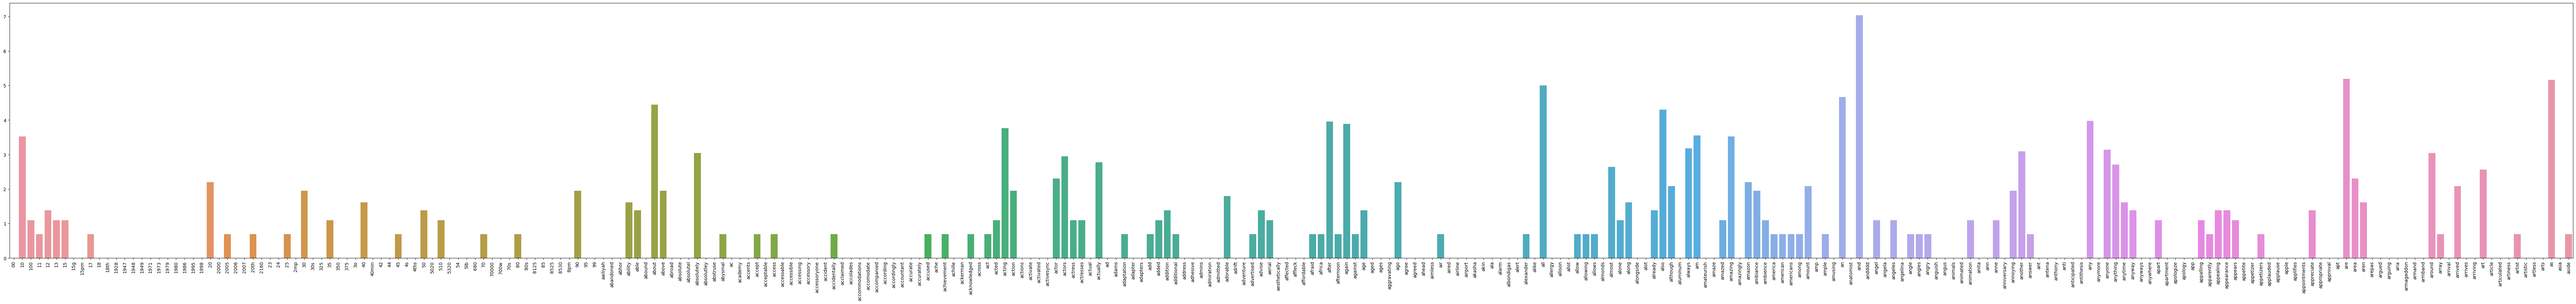

In [149]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### 5.6 Discretization and Binarization
In this section we are going to discuss a very important pre-preprocessing technique used to transform the data, specifically categorical values, into a format that satisfies certain criteria required by particular algorithms. Given our current original dataset, we would like to transform one of the attributes, category_name, into four binary attributes. In other words, we are taking the category name and replacing it with a n asymmetric binary attributes. The logic behind this transformation is discussed in detail in the recommended Data Mining text book (please refer to it on page 58). People from the machine learning community also refer to this transformation as one-hot encoding, but as you may become aware later in the course, these concepts are all the same, we just have different prefrence on how we refer to the concepts. Let us take a look at what we want to achieve in code.

In [170]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.data_from)
X['bin_data_from'] = mlb.transform(X['data_from']).tolist()
X_Sample = X.sample(n=100)
X_Sample[0:9]

,text,category,data_from,bin_data_from
2417,I really enjoyed eating here.,1,yelp_labelled.txt,"[0, 0, 1]"
1164,It was a good thing that the tickets only cost...,0,imdb_labelled.txt,"[0, 1, 0]"
465,The battery works great!,1,amazon_cells_labelled.txt,"[1, 0, 0]"
2741,It was way over fried.,0,yelp_labelled.txt,"[0, 0, 1]"
2446,Will not be back.,0,yelp_labelled.txt,"[0, 0, 1]"
532,Unfortunately it's easy to accidentally activa...,0,amazon_cells_labelled.txt,"[1, 0, 0]"
924,Works good.,1,amazon_cells_labelled.txt,"[1, 0, 0]"
2671,I promise they won't disappoint.,1,yelp_labelled.txt,"[0, 0, 1]"
549,I own a Jabra Earset and was very happy with i...,1,amazon_cells_labelled.txt,"[1, 0, 0]"


## 6. Data Exploration

Sometimes you need to take a peek at your data to understand the relationships in your dataset. Here, we will focus in a similarity example. Let's take 3 documents and compare them.

In [151]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['good protection and does not make phone too bulky.']
['Buyer Beware, you could flush money right down the toilet.']
['Audio Quality is poor, very poor.']


In [152]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [153]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000
